In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer



import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer


In [14]:
df = pd.read_csv('C:/Users/pande/Capstone/Profiles/data/df_processed_bio.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bio                 1057 non-null   object
 1   word_tokenized      1057 non-null   object
 2   sentence_tokenized  1057 non-null   object
 3   word_count          1057 non-null   int64 
 4   sentence_count      1057 non-null   int64 
 5   clean_words         1057 non-null   object
 6   clean_stemmed       1057 non-null   object
 7   clean_lemmed        1057 non-null   object
dtypes: int64(2), object(6)
memory usage: 66.2+ KB


In [4]:
# create the transform
vectorizer = CountVectorizer(stop_words = 'english')
# tokenize and build vocab
bag_of_words = vectorizer.fit_transform(df.clean_lemmed)
# summarize
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:10]

[('year', 715),
 ('skill', 578),
 ('completed', 496),
 ('disability', 361),
 ('work', 324),
 ('english', 300),
 ('old', 281),
 ('experience', 276),
 ('course', 267),
 ('computer', 264)]

In [5]:
df_counts = pd.DataFrame(dict(words_freq), index = ['frequency'])
df_counts = df_counts.T
df_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8198 entries, year to hopeful
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   frequency  8198 non-null   int64
dtypes: int64(1)
memory usage: 128.1+ KB


In [6]:
df_counts

,frequency
year,715
skill,578
completed,496
disability,361
work,324
...,...
wearing,1
deterioration,1
nishas,1
narrates,1


In [7]:

vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(2, 4), max_df = .10, stop_words='english', norm = 'l1')
vz = vectorizer.fit_transform(df.clean_lemmed)

vz.shape

(1057, 115648)

In [8]:
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']
newDF=tfidf.sort_values(by='tfidf',ascending=True)
newDF[200:250]

E:\Anaconda\envs\myenvnew\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
learnt soft,4.113988
learnt soft skill,4.113988
course meet required standard,4.113988
development course meet,4.113988
development course meet required,4.113988
credit card learnt,4.113988
credit card learnt soft,4.113988
autism spectrum disorder,4.113988
english strong base office,4.135494
learnt soft skill basic,4.135494


<AxesSubplot: >

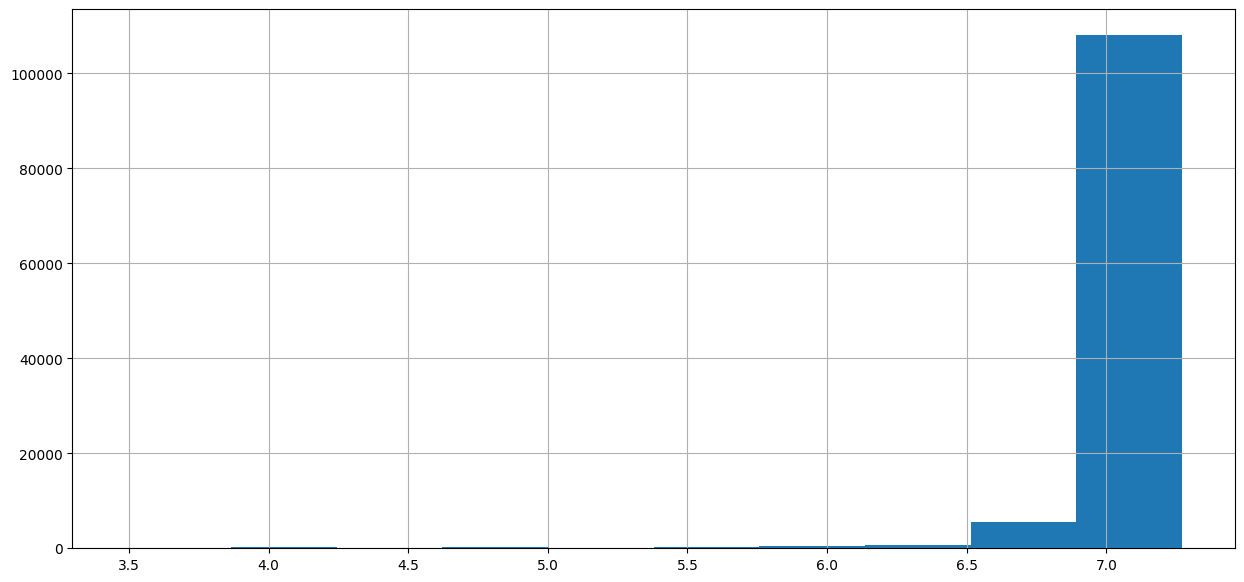

In [9]:
tfidf.tfidf.hist(figsize=(15,7))


In [10]:

def plot_word_cloud(terms):
    text = terms.index
    text = ' '.join(list(text))
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure(figsize=(25, 25))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

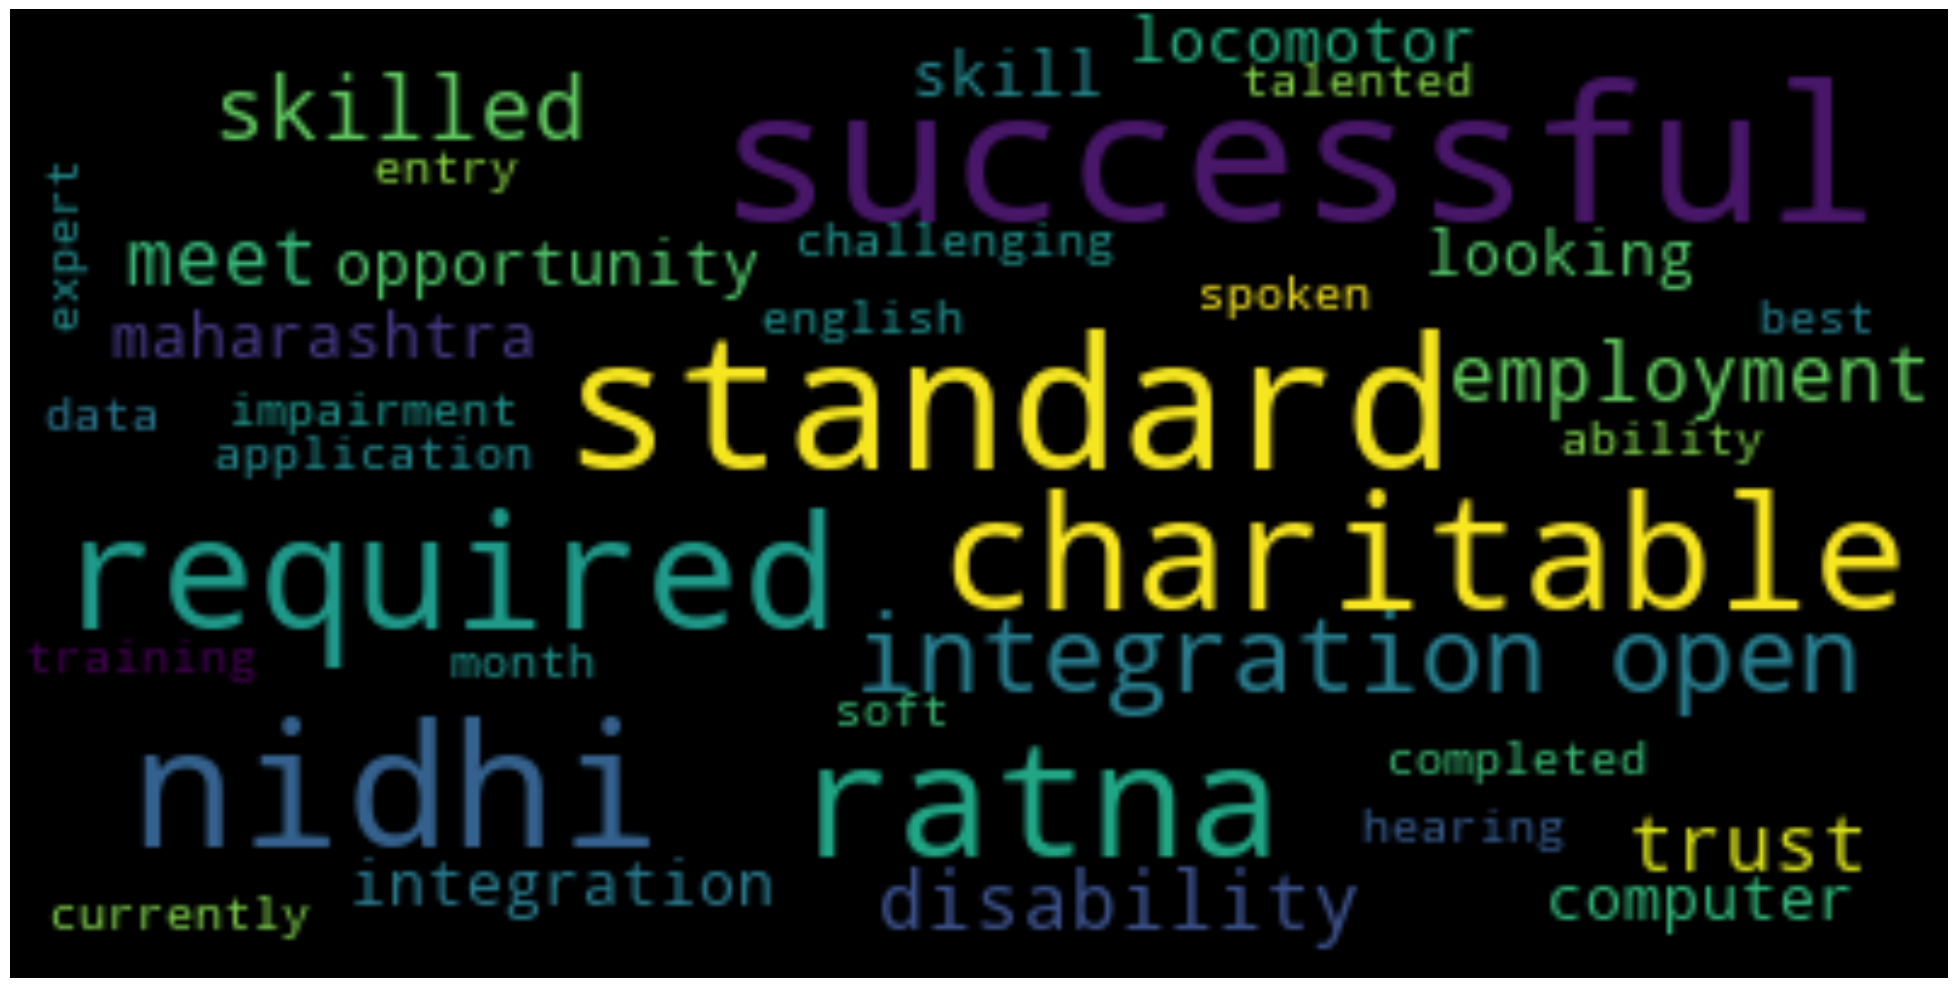

In [11]:
plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=True).head(40))


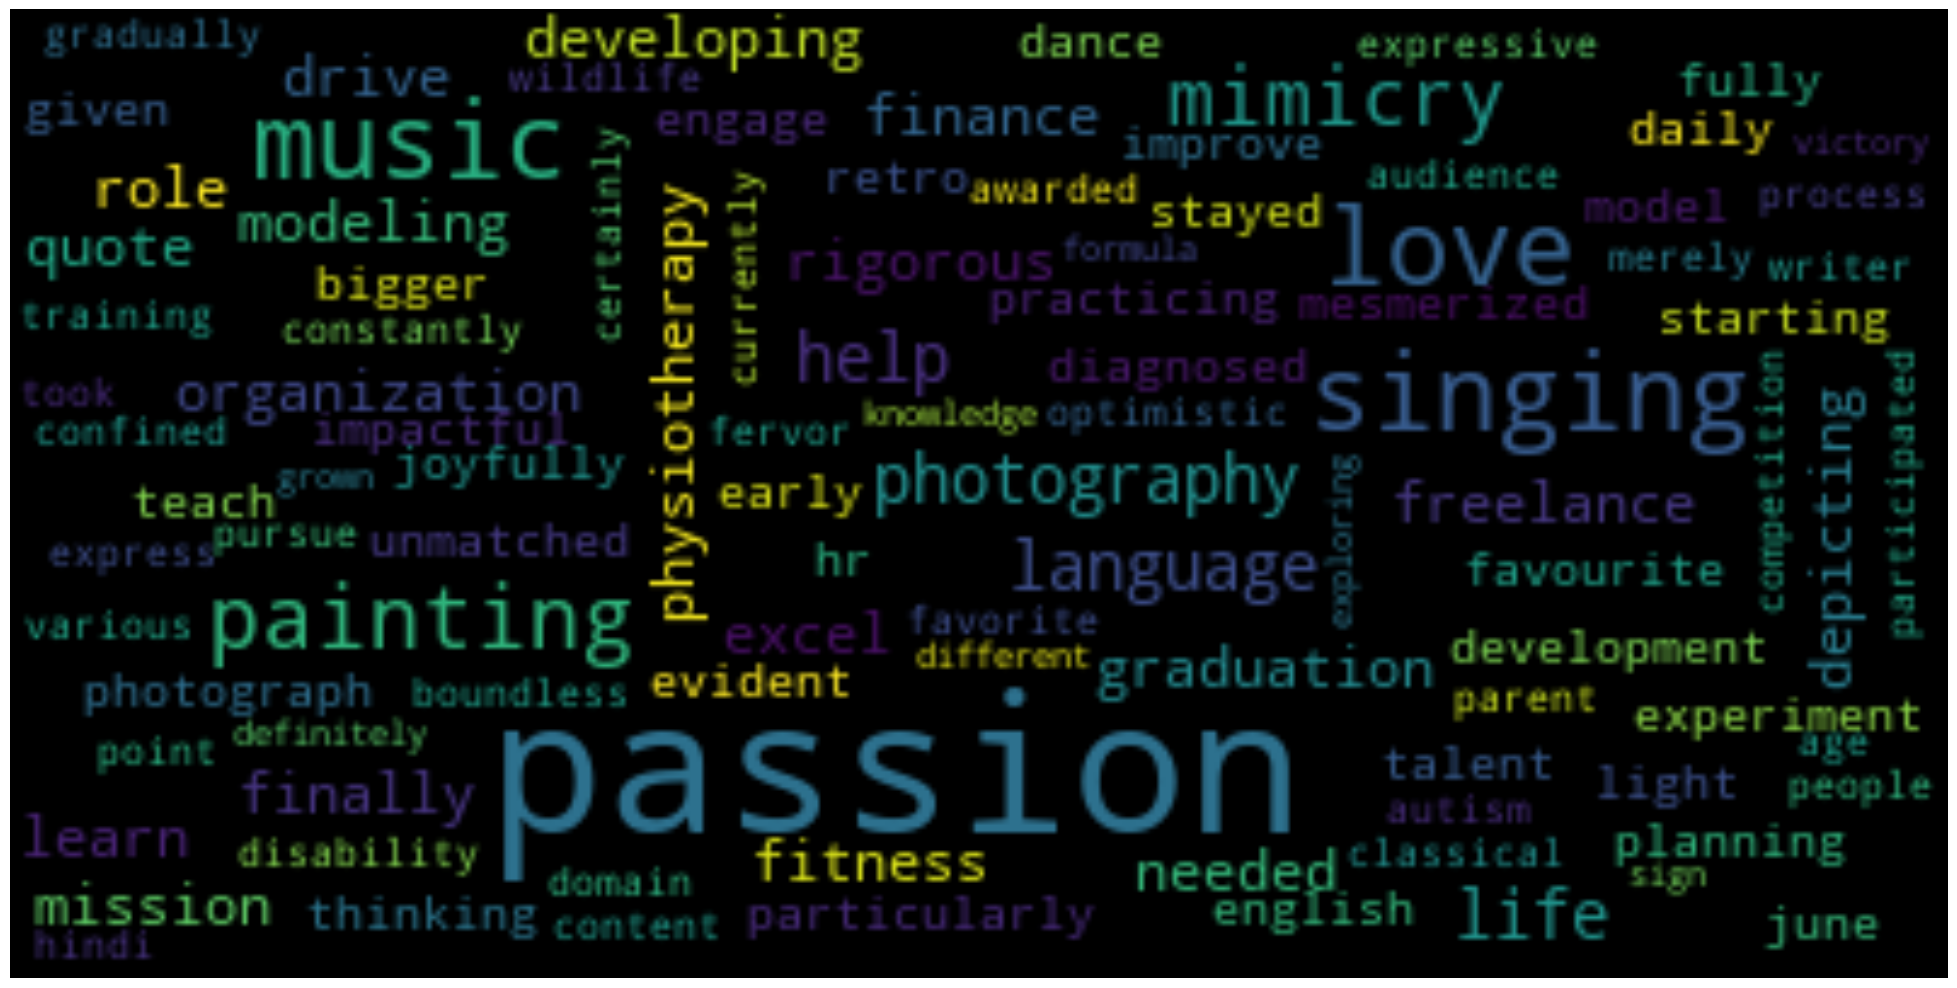

In [12]:
plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=False).head(100))
